<a href="https://colab.research.google.com/github/supriyaohdar/Investment-Analysis/blob/main/InvestmentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MedTourEasy Internship
Investment Analysis Project

#Project Description
When you assess whether to invest in an asset, you want to look not only at how much money youcould make but also at how much risk you are taking. The Sharpe Ratio, developed by Nobel Prizewinner William Sharpe some 50 years ago, does precisely this: it compares the return of aninvestment to that of an alternative and relates the relative return to the risk of the investment,measured by the standard deviation of returns.In this project, you will apply the Sharpe ratio to real financial data using pandas.

In [ ]:
#Import Files
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
#Load the data
#from google.colab import files
#uploaded=files.upload()

#Task 1: Read The Data

In [ ]:
stock_data=pd.read_csv("stock_data.csv",parse_dates=['Date'],index_col='Date').dropna()
benchmark_data=pd.read_csv("benchmark_data.csv",parse_dates=['Date'],index_col='Date').dropna()

#Task 2:Take a peek at the data you loaded in the last task.

In [ ]:
stock_data.head()


,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [ ]:
benchmark_data.head()

,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


In [ ]:
benchmark_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


#Task 3:Plot and summarize the stock_data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2930eaad0>,
      dtype=object)

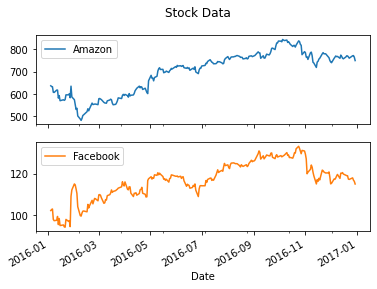

In [ ]:
stock_data.plot(subplots=True,title='Stock Data')


In [ ]:
stock_data.describe()

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


#Task 4: Plot and summarize the benchmark_data


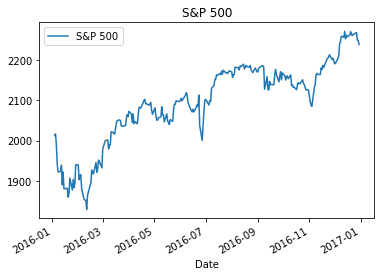

In [ ]:
benchmark_data.plot(title='S&P 500')

In [ ]:
benchmark_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


#Task 5: Calculate, plot and summarize the stock_data returns

In [ ]:
stock_returns=stock_data.pct_change()

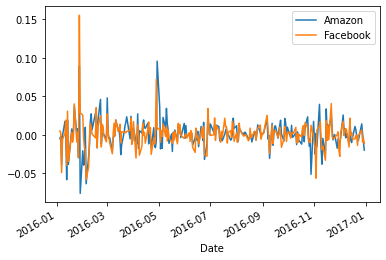

In [ ]:
stock_returns.plot()

In [ ]:
stock_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


#Task 6:Calculate, summarize, and plot daily returns for the benchmark_data

In [ ]:
sp_returns=pd.Series(benchmark_data['S&P 500']).pct_change()

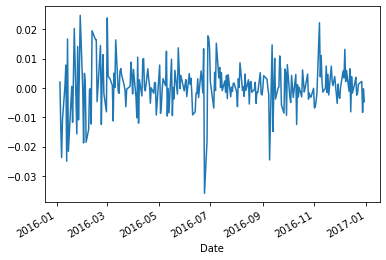

In [ ]:
sp_returns.plot()

In [ ]:
sp_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

#Task 7:Calculate, plot and describe the difference between stock_returns and sp_returns

In [ ]:
excess_returns=stock_returns.sub(sp_returns,axis=0)

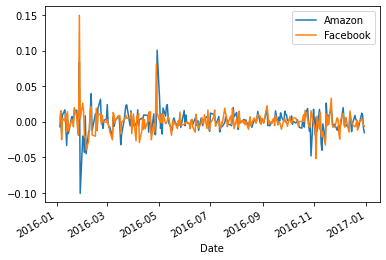

In [ ]:
excess_returns.plot()

In [ ]:
excess_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


#Task 8:Calculate and plot the mean of excess_returns

In [ ]:
 avg_excess_return=excess_returns.mean()

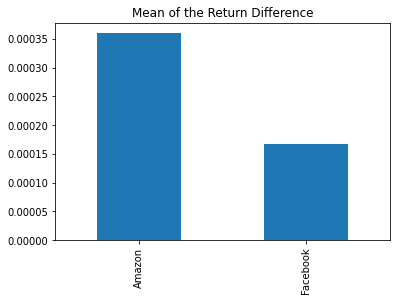

In [ ]:
avg_excess_return.plot.bar(title='Mean of the Return Difference')

#Task 9:Calculate and visualize the standard deviation of excess_returns

In [ ]:
 sd_excess_return=excess_returns.std()

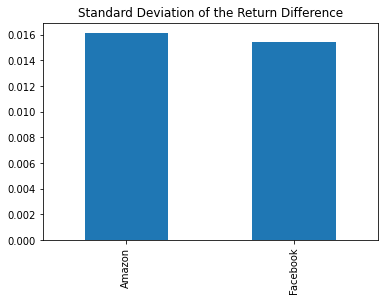

In [ ]:
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

#Task 10: calculate the Sharpe ratio, then annualize

In [ ]:
daily_sharpe_ratio=avg_excess_return.div(sd_excess_return)

In [ ]:
annual_factor=np.sqrt(252)

In [ ]:
annual_sharpe_ratio=daily_sharpe_ratio.mul(annual_factor)

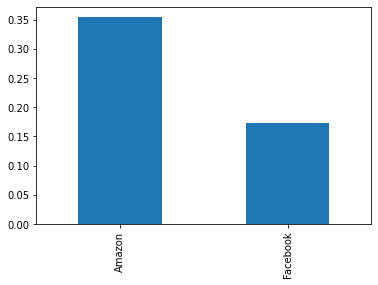

In [ ]:
annual_sharpe_ratio.plot.bar('Annualized Sharpe Ratio: Stocks vs S&P500')

#Task 11:Select the stock you would have picked in 2016 based on the Sharpe Ratio

Amazon Sharpe ratio is twice in comparision to Facebook in 2016. So, i would select Amazon.

In [ ]:
buy_amazon=True